___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

In [253]:
import pandas as pd
import matplotlib.pyplot as plt

## Load stock data
At first we load the csv files containing the stock prices of apple, amazon, general electric and the CBOE Volatility Index since 1-1-2010

In [254]:
#aapl = pd.read_csv("apple_2010.csv",index_col='Date',parse_dates=True)
amzn = pd.read_csv("amazon_2010.csv",index_col='Date',parse_dates=True)
ge = pd.read_csv("GE_2010.csv",index_col='Date',parse_dates=True)
vix = pd.read_csv("VIX_2010.csv",index_col='Date',parse_dates=True)
#sp500 = pd.read_csv("sp500_2010.csv",index_col='Date',parse_dates=True)

In [255]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


In [256]:
import yfinance as yf

appl=yf.download(["MGLU3.SA"], start="2020-01-01").dropna()
sp500  =  yf.download(["^BVSP"], start="2020-01-01").dropna()

print(len(appl), len(sp500))
sp500.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
937 937


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,115652.0,118573.0,115649.0,118573.0,118573.0,5162700
2020-01-03,118564.0,118792.0,117341.0,117707.0,117707.0,6834500
2020-01-06,117707.0,117707.0,116269.0,116878.0,116878.0,6570000
2020-01-07,116872.0,117076.0,115965.0,116662.0,116662.0,4854100
2020-01-08,116667.0,117335.0,115693.0,116247.0,116247.0,5910500


## Compute cumulative returns
The cumulative return is the overall total return of an investment over a given time period.
You can compute it by subtracting the current price of a stock from the price it had when you bought it.<br />
To compute the percentage value, you divide it instead of subtracting

In [257]:
appl["Adj Close"]

Date
2020-01-02    12.029735
2020-01-03    11.922435
2020-01-06    11.932190
2020-01-07    11.898048
2020-01-08    12.263843
                ...    
2023-09-29     2.120000
2023-10-02     2.010000
2023-10-03     1.840000
2023-10-04     1.890000
2023-10-05     1.820000
Name: Adj Close, Length: 937, dtype: float64

In [258]:
def compute_cumulative(data, get_absolute=True):
    initial_price = data["Adj Close"].iloc[0]
    last_price = data["Adj Close"].iloc[-1]
    if get_absolute:
        # Returns absolute dollar gain for 1 share
        return last_price - initial_price
    else:
        # Returns percentage change
        return 100*(last_price-initial_price) / initial_price   #last_price/initial_price
        

In [259]:
aapl_absolute_cumulative_return = compute_cumulative(aapl)
aapl_percentage_cumulative_return = compute_cumulative(aapl, False) 

amzn_absolute_cumulative_return = compute_cumulative(amzn)
amzn_percentage_cumulative_return = compute_cumulative(amzn, False) 

ge_absolute_cumulative_return = compute_cumulative(ge)
ge_percentage_cumulative_return = compute_cumulative(ge, False)  

sp500_absolute_cumulative_return = compute_cumulative(sp500)
sp500_percentage_cumulative_return = compute_cumulative(sp500, False)  


print(f"Apple cumulative return: {aapl_absolute_cumulative_return}; Percentage: {aapl_percentage_cumulative_return}%")
print(f"Amazon cumulative return: {amzn_absolute_cumulative_return}; Percentage: {amzn_percentage_cumulative_return}%")
print(f"GE cumulative return: {ge_absolute_cumulative_return}; Percentage: {ge_percentage_cumulative_return}%")
print(f"SP500 cumulative return: {sp500_absolute_cumulative_return}; Percentage: {sp500_percentage_cumulative_return}%")

Apple cumulative return: 147.72606801986694; Percentage: 2247.14828034095%
Amazon cumulative return: 3343.530044555664; Percentage: 2485.5262699691684%
GE cumulative return: 18.687515258789062; Percentage: 21.713892313221308%
SP500 cumulative return: -5738.4375; Percentage: -4.83958194529952%


## Visualized Cummulative Returns Over Time

### Absolute Returns (a.k.a How many dollars earned per share if held since start of time series?)
We can also plot the cumulative returns over time by  subtracting) all prices from the initial one

**IMPORTANT NOTE: This doesn't tell you the initial price of a share, so a \\$100 gain per share is great if you bought each share at \\$5 but not as great if each share cost you \\$10000!**

In [260]:
aapl["Cumulative_Absolute"] = aapl["Adj Close"] - aapl["Adj Close"].iloc[0]
amzn["Cumulative_Absolute"] = amzn["Adj Close"] - amzn["Adj Close"].iloc[0]
ge["Cumulative_Absolute"] = ge["Adj Close"] - ge["Adj Close"].iloc[0]
sp500["Cumulative_Absolute"] = sp500["Adj Close"] - sp500["Adj Close"].iloc[0]

C:\Users\MarcoAurelioNajarOst\AppData\Local\Temp\ipykernel_27048\870032993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl["Cumulative_Absolute"] = aapl["Adj Close"] - aapl["Adj Close"].iloc[0]


Text(0, 0.5, 'Absolute Dollar Gain per Share')

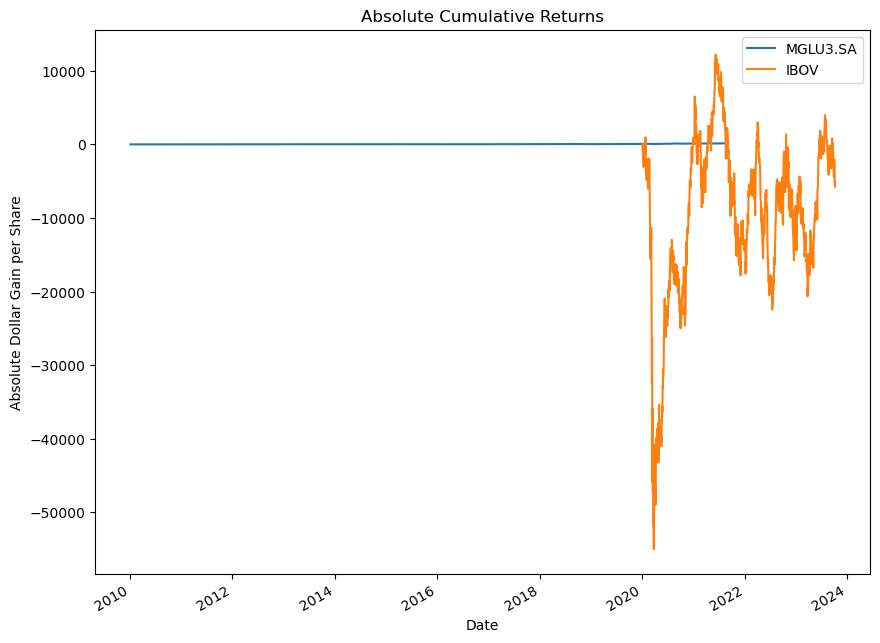

In [261]:
aapl["Cumulative_Absolute"].plot(label="MGLU3.SA", figsize=(10, 8))
sp500["Cumulative_Absolute"].plot(label="IBOV")

plt.legend()
plt.title("Absolute Cumulative Returns")
plt.ylabel("Absolute Dollar Gain per Share")

Note how this plot is really not that informative since it never informed us of the initial price per share! This is why we begin to think about "normalizing" our gains. We need a way to fairly compare performance between individual stocks, like percentage gain!

In [262]:
aapl["Cumulative_Percentage"] = 100* (aapl["Adj Close"]-aapl["Adj Close"].iloc[0]) / aapl["Adj Close"].iloc[0]
sp500["Cumulative_Percentage"] = 100* (sp500["Adj Close"]-sp500["Adj Close"].iloc[0]) / sp500["Adj Close"].iloc[0]

C:\Users\MarcoAurelioNajarOst\AppData\Local\Temp\ipykernel_27048\1517975835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl["Cumulative_Percentage"] = 100* (aapl["Adj Close"]-aapl["Adj Close"].iloc[0]) / aapl["Adj Close"].iloc[0]


You can see that comparing absolute cumulative returns is not ideal because of different scalings, thus we should use the percentage values:

Text(0.5, 1.0, 'Percent Cumulative Returns')

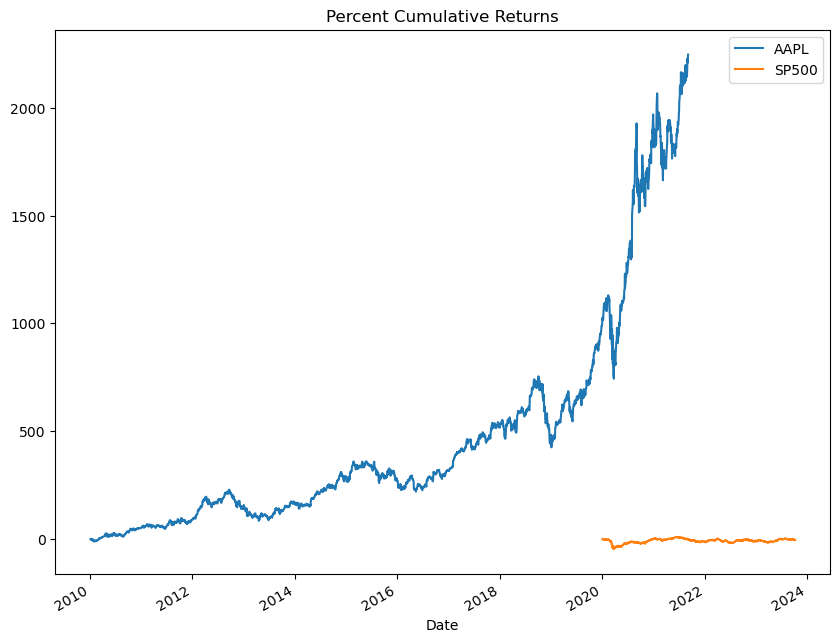

In [263]:
aapl["Cumulative_Percentage"].plot(label="AAPL", figsize=(10, 8))
sp500["Cumulative_Percentage"].plot(label="SP500")

plt.legend()
plt.title("Percent Cumulative Returns")


We can compute the daily return for both shares by computing the percentage change between the current adjusted price and the price one day before.
We can directly perform this task by using **pct_change(period)** provided by pandas.
As the first row is now NaN we can directly drop it (alternatively you can use .iloc[1:])

In [264]:
aapl["Daily Return"] = aapl["Adj Close"].pct_change(1)
amzn["Daily Return"] = amzn["Adj Close"].pct_change(1)
ge["Daily Return"] = ge["Adj Close"].pct_change(1)
sp500["Daily Return"] = sp500["Adj Close"].pct_change(1)
vix["Daily Return"] = vix["Adj Close"].pct_change(1)

C:\Users\MarcoAurelioNajarOst\AppData\Local\Temp\ipykernel_27048\3123692918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl["Daily Return"] = aapl["Adj Close"].pct_change(1)


We can use a histogram to plot the daily returns

Text(0.5, 1.0, 'Daily Returns: Apple')

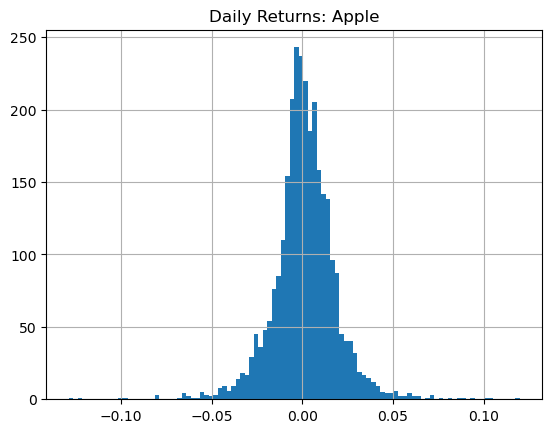

In [265]:
aapl["Daily Return"].hist(bins=100)
plt.title("Daily Returns: Apple")

Text(0.5, 1.0, 'Daily Returns: Amazon')

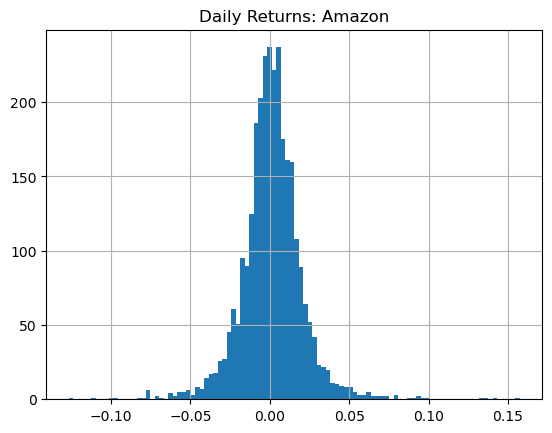

In [266]:
amzn["Daily Return"].hist(bins=100)
plt.title("Daily Returns: Amazon")

Text(0.5, 1.0, 'Daily Returns: GE')

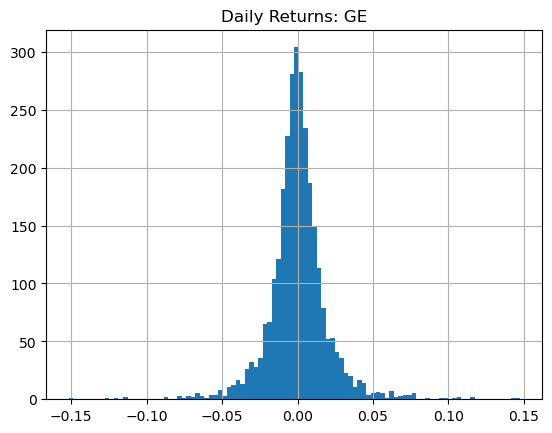

In [267]:
ge["Daily Return"].hist(bins=100)
plt.title("Daily Returns: GE")

Text(0.5, 1.0, 'Daily Returns: sp500')

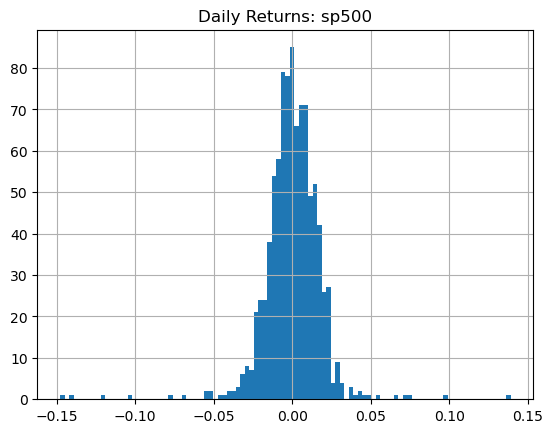

In [268]:
sp500["Daily Return"].hist(bins=100)
plt.title("Daily Returns: sp500")

# Daily Return Performance Comparison 

## Compare daily returns with benchmark.
We can use a scatter plot to compare the daily return of our stocks with the sp500.

ValueError: x and y must be the same size

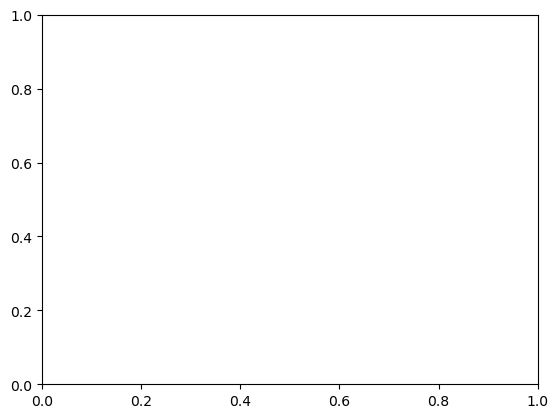

In [269]:

plt.scatter(aapl['Daily Return'],sp500['Daily Return'],alpha=0.3)
plt.xlabel("Daily Change: Apple")
plt.ylabel("Daily Change: SP500")

In [270]:
len(aapl['Daily Return'])

2938

In [271]:
len(sp500['Daily Return'])

937

In [ ]:
plt.scatter(amzn['Daily Return'],sp500['Daily Return'],alpha=0.3)
plt.xlabel("Daily Change: Amazon")
plt.ylabel("Daily Change: SP500")

In [ ]:
plt.scatter(ge['Daily Return'],sp500['Daily Return'],alpha=0.3)
plt.xlabel("Daily Change: GE")
plt.ylabel("Daily Change: SP500")

### Cummulative Returns from Daily Returns

Using a bit of clever math, we can see that cummulative returns can be derived from daily returns:

In [ ]:
aapl

In [ ]:
(1 + aapl['Adj Close'].pct_change(1)).cumprod() - 1

In [ ]:
ser = (1 + aapl['Adj Close'].pct_change(1)).cumprod() - 1
100*ser

----------------

**Now the questions: How can we fairly evaluate performance of an individual stock (or custom portfolio of stocks) against the performance of the "market" (typically some benchmark, like the SP500 or Russell 3000)?**

------


# Capital Asset Pricing Model
"The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks." https://www.investopedia.com/terms/c/capm.asp

Mathematically it is defined as:
$$ ER_i = R_f + \beta_i*(ER_m-R_f)$$

* $R_f$ is the risk free rate (currently 0, see next lecture notebook for details why, 
* $\beta$ is the beta of the investment, (Volatility or risk compared to the market (SP500)),
* $ER_m$ is the expected return of the market (SP500),
* $ER_i$ is the expected return of your investment


To compute $\beta$ you can fit a linear regression, where x is the market (sp500) and y is the stock of your choice (apple, amazon, ge). 
Additionally this linear regression returns $\alpha$ (the intercept) which can be interpreted as the excess return to the market.

We use **linregress(x, y)** from scipy.stats to compute the least squares regression

In [ ]:
from scipy.stats import linregress

In [ ]:
help(linregress)

**IMPORTANT NOTE: We can't have NaN data here, make sure to drop it if you still have it in your dataframe, otherwise you will get a warning and NaN values for Alpha and Beta.**

In [ ]:
aapl = aapl.dropna()
amzn = amzn.dropna()
ge = ge.dropna()
sp500 = sp500.dropna()
vix = vix.dropna()

In [ ]:
beta_apple, alpha_apple, _, _, _ = linregress(sp500["Daily Return"], aapl["Daily Return"])
beta_sp500, alpha_sp500, _, _, _ = linregress(sp500["Daily Return"], sp500["Daily Return"])

Both, apple and amazon have a small beta and a positive alpha which indicates excess returns

In [ ]:
print(f"beta of Apple: {beta_apple}, Alpha: {alpha_apple}")

In [ ]:
print(f"beta of Amazon: {beta_amzn}, Alpha: {alpha_amzn}")

As you can see, GE has a higher beta and a negative alpha. This means that the risk of GE is higher compared to the market AND it yielded less returns than the sp500

In [ ]:
print(f"beta of GE: {beta_ge}, Alpha: {alpha_ge}")

To verify everything, the $\beta$ of sp500 should be 1 and  $\alpha$ should be zero

In [ ]:
print(f"beta of SP500: {beta_sp500}, Alpha: {alpha_sp500}")

To deepen our understanding: The volatility index express the volatility of the sp500 and is inverse to the market, thus it should have a negative $\beta$

In [ ]:
beta_vix, alpha_vix, _, _, _ = linregress(sp500["Daily Return"], vix["Daily Return"])

In [ ]:
beta_vix

In [ ]:
alpha_vix

Additionally we can take a look at a leveraged SP500 (SSO): It should have a beta of 2

In [ ]:
sp500_leveraged = pd.read_csv("sp_leveraged_2010.csv")  

In [ ]:
sp500_leveraged["Daily Return"] = sp500_leveraged["Adj Close"].pct_change(1)
sp500_leveraged = sp500_leveraged.dropna()


In [ ]:
beta_sp500_leveraged, alpha_sp500_leveraged, _, _, _ = linregress(sp500["Daily Return"], sp500_leveraged["Daily Return"])

In [ ]:
beta_sp500_leveraged

In [ ]:
alpha_sp500_leveraged # Notice how this is almost zero

**Great work! For more information on CAPM, check out: https://en.wikipedia.org/wiki/Capital_asset_pricing_model**